<a href="https://colab.research.google.com/github/Alexxx411/cs181pj3/blob/master/pj3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.models import *
from tensorflow.python.keras.layers import *

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [0]:
fashion_mnist = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

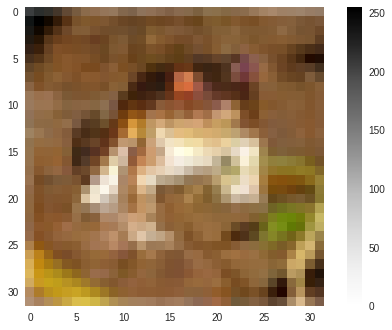

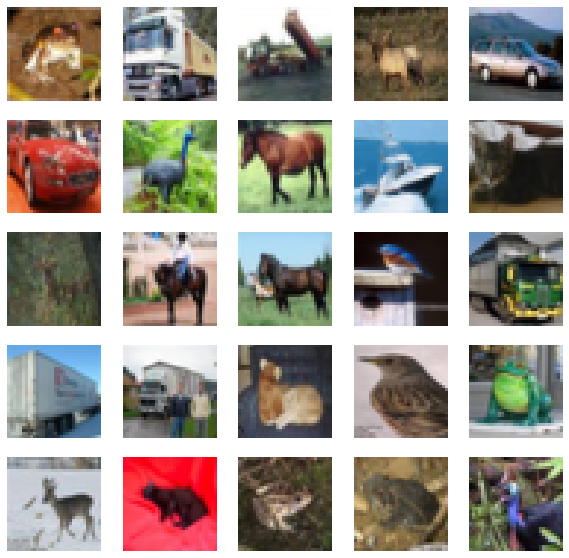

In [47]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
train_images = train_images / 255.0

test_images = test_images / 255.0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()


In [56]:
model = keras.Sequential()

model.add(Conv2D(64, (7, 7), padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),data_format='channels_first'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3),padding='same',input_shape=(16,16,64)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),data_format='channels_first'))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3),padding='same',input_shape=(8,8,128)))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3),padding='same',input_shape=(4,4,256)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),data_format='channels_first'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(10))

model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 64)        9472      
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 16, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 32, 16, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 16, 128)       36992     
_________________________________________________________________
activation_20 (Activation)   (None, 32, 16, 128)       0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 8, 64)         0         
__________

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 44s 871us/sample - loss: 1.6820 - acc: 0.3892
Epoch 2/5
50000/50000 [==============================] - 43s 851us/sample - loss: 1.3305 - acc: 0.5252
Epoch 3/5
50000/50000 [==============================] - 43s 858us/sample - loss: 1.1801 - acc: 0.5828
Epoch 4/5
50000/50000 [==============================] - 42s 839us/sample - loss: 1.0786 - acc: 0.6174
Epoch 5/5
50000/50000 [==============================] - 43s 856us/sample - loss: 1.0015 - acc: 0.6474


In [59]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 3s 328us/sample - loss: 1.0110 - acc: 0.6459
Test accuracy: 0.6459
